<a href="https://colab.research.google.com/github/infinitenaveen/frauddetection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github Link :




#FRAUD DETECTION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#statistical data
import scipy.stats as stats

#for splitting data and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#for sampling
from imblearn.over_sampling import SMOTE

#for model building
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

#for model evaluation
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import recall_score, precision_score

In [ ]:
path = r"C:\Users\MLC\Documents\creditcard.csv"

df = pd.read_csv(path)

In [ ]:
#first five rows of the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

DATA HAS NO MISSING VALUES

In [ ]:
#checking for imbalance of the target  variable
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

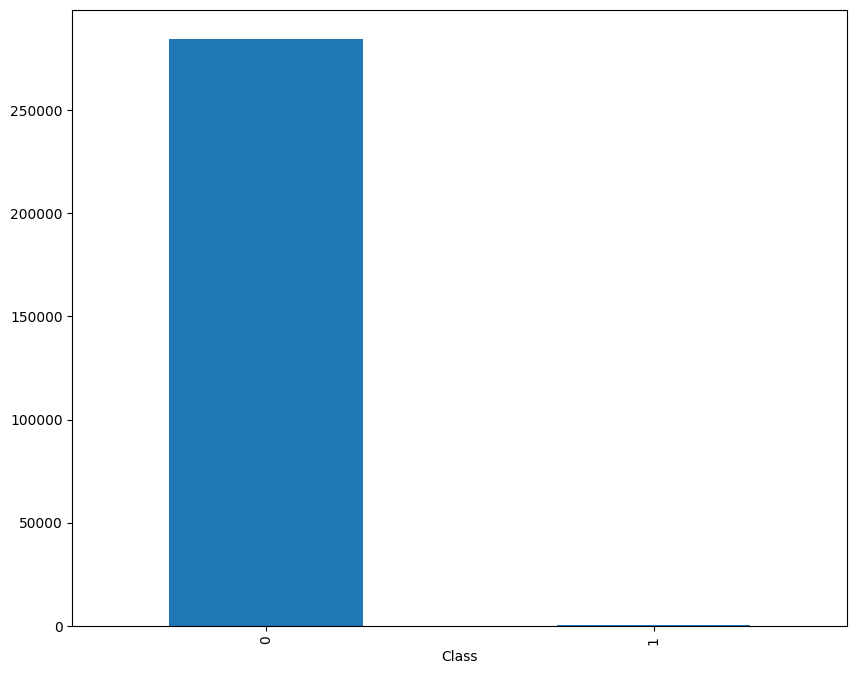

In [ ]:
df.Class.value_counts().plot.bar()

# We see that the target variable is highly imbalanced. We may have to imply oversampling techniques to counter this

# Since the data is masked, doing exploratory Data Analysis wouldn't make sense


# We will go ahead with feature selection


# Distribution of the variables


FEATURE SELECTION

In [ ]:
stat_df = pd.DataFrame()
stat_df['Feature'] = df.drop(columns='Class').columns
pvalue = []

for i in df.drop(columns='Class').columns:
    class_1=df.loc[df.Class==1,i]
    class_0=df.loc[df.Class==0,i]
    pvalue.append(stats.ttest_ind(class_1,class_0)[1])

stat_df['pvalue'] = pvalue


In [ ]:
selected_features = stat_df.loc[stat_df.pvalue<0.05]['Feature'].values

#Base Model#


In [ ]:
# Model : Linear Regression

#split the data
x = df[selected_features]
y = df.Class

X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape, x_test.shape

((199364, 27), (85443, 27))

In [ ]:
#scale the data
sc = StandardScaler()
X_train_s = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
x_test_s = pd.DataFrame(sc.transform(x_test), columns=x_test.columns)

In [ ]:
#adding constant column in x_train and x_test
X_train_s = sm.add_constant(X_train_s)
x_test_s = sm.add_constant(x_test_s)

In [ ]:
y_train = y_train.reset_index().drop(columns='index')
y_test = y_test.reset_index().drop(columns='index')

In [ ]:
#before model building we will build an evaluation function

def evaluation(y_test,y_pred):

    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()


In [ ]:
#fit model
base_model = sm.Logit(y_train, X_train_s).fit()
y_pred_prob = base_model.predict(x_test_s)

Optimization terminated successfully.
         Current function value: 0.003924
         Iterations 13


In [ ]:
#summary of the model
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                          Logit   Df Residuals:                   199336
Method:                           MLE   Df Model:                           27
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.6918
Time:                        11:20:48   Log-Likelihood:                -782.32
converged:                       True   LL-Null:                       -2538.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5727      0.170    -50.318      0.000      -8.907      -8.239
Time          -0.0795      0.123     -0.645      0.519      -0.321       0.162
V1             0.2186      0.098      2.234      0.025       0.027       0.410
V2             0.0063      0.117      0.054      0.957      -0.222       0.235
V3             0.1155      0.100      1.154      0.248      -0.081       0.312
V4             0.9661      0.130      7.413      0.000       0.711       1.221
V5             0.1051      0.115      0.914      0.361      -0.120       0.330
V6            -0.1025      0.119     -0.861      0.389      -0.336       0.131
V7            -0.1404      0.105     -1.335      0.182      -0.346       0.066
V8            -0.1625      0.056     -2.908      0.004      -0.272      -0.053
V9            -0.2781      0.147     -1.894      0.058      -0.566       0.010
V10           -0.9455      0.128     -7.389      0.000      -1.196      -0.695
V11            0.0194      0.098      0.197      0.844      -0.173       0.212
V12            0.1629      0.110      1.479      0.139      -0.053       0.379
V13           -0.3133      0.099     -3.152      0.002      -0.508      -0.118
V14           -0.5487      0.074     -7.403      0.000      -0.694      -0.403
V15           -0.1114      0.096     -1.158      0.247      -0.300       0.077
V16           -0.1793      0.120     -1.491      0.136      -0.415       0.056
V17           -0.0729      0.073     -0.997      0.319      -0.216       0.070
V18            0.0004      0.123      0.004      0.997      -0.240       0.241
V19            0.0197      0.092      0.213      0.831      -0.161       0.200
V20           -0.3869      0.080     -4.856      0.000      -0.543      -0.231
V21            0.1665      0.045      3.694      0.000       0.078       0.255
V24            0.0887      0.107      0.831      0.406      -0.120       0.298
V26            0.1401      0.102      1.376      0.169      -0.059       0.340
V27           -0.3378      0.063     -5.398      0.000      -0.461      -0.215
V28           -0.1170      0.037     -3.204      0.001      -0.189      -0.045
Amount         0.2313      0.112      2.064      0.039       0.012       0.451
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
y_pred = []

#taking threshold at 0.5
for i in y_pred_prob:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


Accuracy Score: 0.9991807403766253
f1_score: 0.717741935483871
Precision: 0.8811881188118812
Recall: 0.6054421768707483
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.61      0.72       147

    accuracy                           1.00     85443
   macro avg       0.94      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443



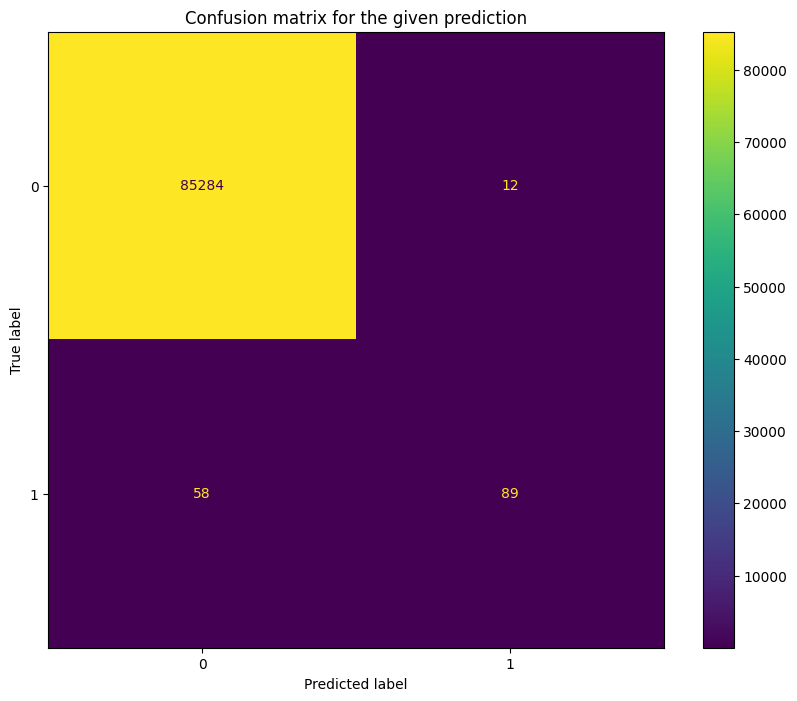

In [ ]:
# Evauating the model
evaluation(y_test, y_pred)

We observe that we get an excellent accuracy score of 99.9% but a poor recall score. This due to the high imbalance in the target class. We will try some oversampling techniques to see if we can counter this

#SMOTE

In [ ]:
X_train_sampled, y_train_sampled = SMOTE().fit_resample(X_train_s, y_train)

#NOW WE HAVE OVERSAMPLED TRAINING SET

#WE WILL APPLY LOGISTIC REGRESSION MODEL AGAIN

In [ ]:
model = sm.Logit(y_train_sampled, X_train_sampled).fit()
y_pred_prob = model.predict(x_test_s)

Optimization terminated successfully.
         Current function value: 0.134143
         Iterations 14


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               398038
Model:                          Logit   Df Residuals:                   398010
Method:                           MLE   Df Model:                           27
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.8065
Time:                        11:20:51   Log-Likelihood:                -53394.
converged:                       True   LL-Null:                   -2.7590e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4924      0.015   -226.349      0.000      -3.523      -3.462
Time          -0.2182      0.012    -18.360      0.000      -0.242      -0.195
V1             0.7970      0.019     42.769      0.000       0.761       0.834
V2             0.2568      0.019     13.363      0.000       0.219       0.295
V3             0.2327      0.012     18.985      0.000       0.209       0.257
V4             1.2982      0.012    106.519      0.000       1.274       1.322
V5             0.6204      0.012     50.531      0.000       0.596       0.644
V6            -0.3746      0.012    -31.859      0.000      -0.398      -0.352
V7            -0.1571      0.012    -13.090      0.000      -0.181      -0.134
V8            -0.6042      0.011    -55.447      0.000      -0.626      -0.583
V9            -0.3028      0.015    -20.111      0.000      -0.332      -0.273
V10           -1.0003      0.020    -50.087      0.000      -1.039      -0.961
V11            0.5263      0.012     45.442      0.000       0.504       0.549
V12           -0.8248      0.016    -53.095      0.000      -0.855      -0.794
V13           -0.4377      0.008    -52.156      0.000      -0.454      -0.421
V14           -1.2730      0.016    -81.298      0.000      -1.304      -1.242
V15           -0.0887      0.009    -10.291      0.000      -0.106      -0.072
V16           -0.5605      0.014    -39.878      0.000      -0.588      -0.533
V17           -0.5164      0.018    -29.364      0.000      -0.551      -0.482
V18           -0.1209      0.012    -10.178      0.000      -0.144      -0.098
V19            0.2123      0.009     22.564      0.000       0.194       0.231
V20           -0.3598      0.013    -27.835      0.000      -0.385      -0.335
V21            0.0088      0.008      1.108      0.268      -0.007       0.024
V24            0.0922      0.010      9.108      0.000       0.072       0.112
V26           -0.0154      0.010     -1.616      0.106      -0.034       0.003
V27            0.0500      0.012      4.257      0.000       0.027       0.073
V28            0.1573      0.011     14.703      0.000       0.136       0.178
Amount         0.7616      0.022     34.184      0.000       0.718       0.805
==============================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
y_pred = []

#taking threshold at 0.5
for i in y_pred_prob:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Accuracy Score: 0.9756094706412463
f1_score: 0.11469838572642312
Precision: 0.061169007702763935
Recall: 0.9183673469387755
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



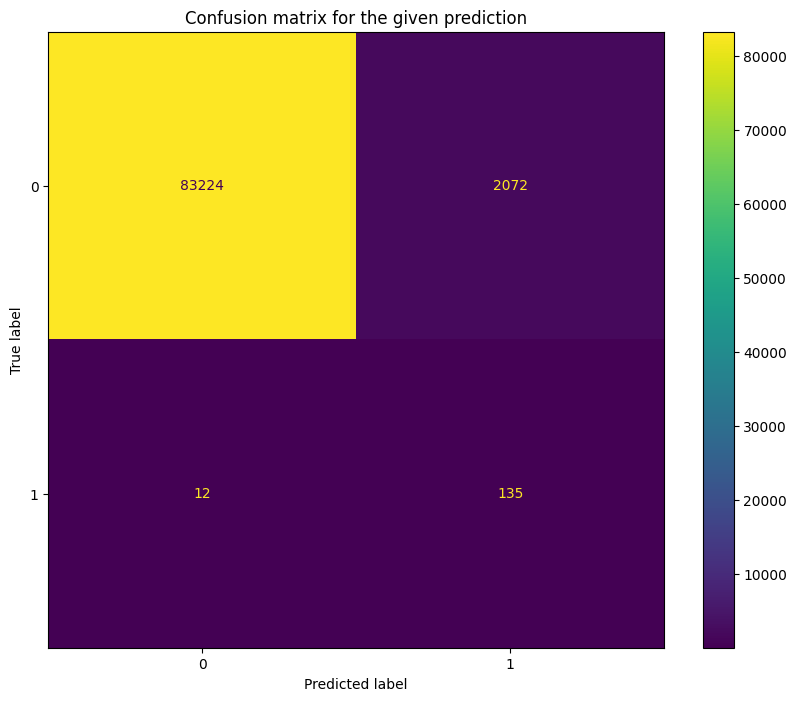

In [ ]:
#evaluating the model
evaluation(y_test, y_pred)

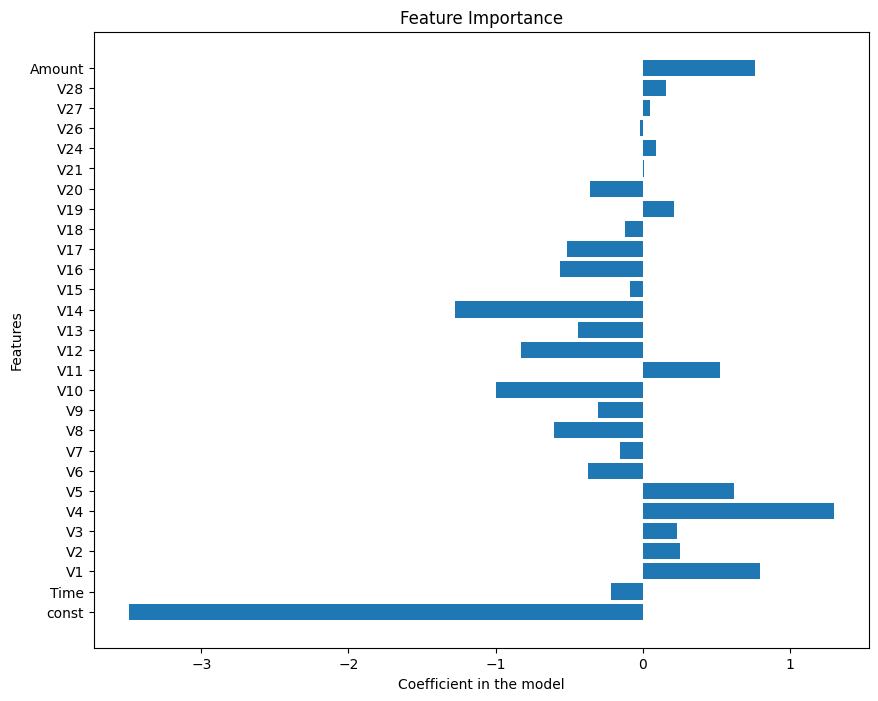

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.barh(y=model.params.index, width=model.params.values)
plt.title('Feature Importance')
plt.ylabel('Features')
plt.xlabel('Coefficient in the model')
plt.show()

We observe that our recall score has imporved considerably in case of a Logistic Regression model. We will further see whether our model could improve through some tree based models

DECISION TREE

In [ ]:
# Model : Decision Tree
# Since we are using decision tree we won't be needing to scale the split data

# We will usie smote to resample the data again
x_train_sampled, y_train_sampled = SMOTE().fit_resample(X_train,y_train)

In [ ]:
dtree = DecisionTreeClassifier()
dmodel = dtree.fit(x_train_sampled, y_train_sampled)
y_pred = dmodel.predict(x_test)

Accuracy Score: 0.9979986657771848
f1_score: 0.575682382133995
Precision: 0.453125
Recall: 0.7891156462585034
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.45      0.79      0.58       147

    accuracy                           1.00     85443
   macro avg       0.73      0.89      0.79     85443
weighted avg       1.00      1.00      1.00     85443



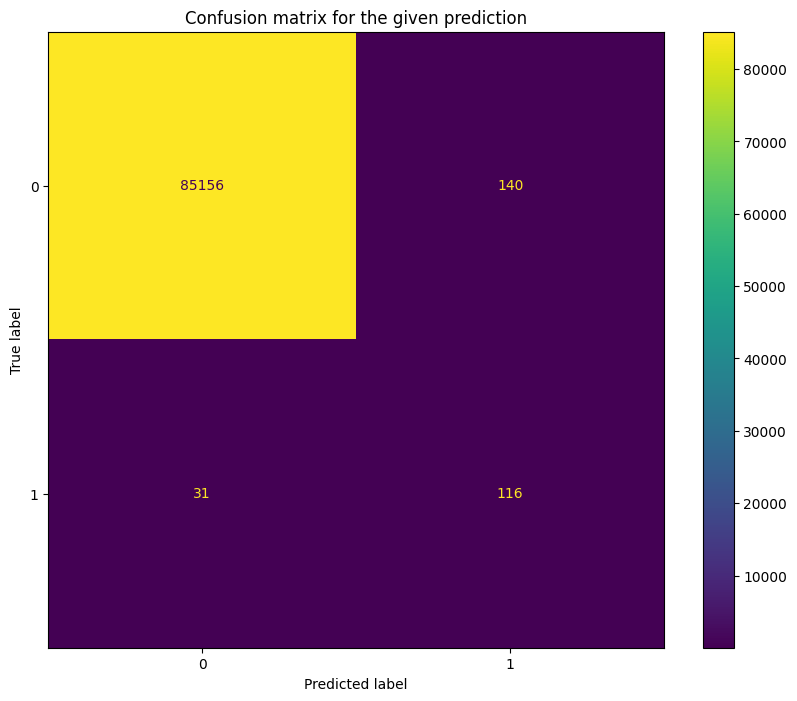

In [ ]:
#evaluating the model
evaluation(y_test, y_pred)

We observe that Decision Tree performs worse than Losgistic Regression. We will now see whether bossting methods actually have a positive effect on the oversampled train data.

In [ ]:
# model : LightGBM
lgbm = LGBMClassifier()
lg_model = lgbm.fit(x_train_sampled, y_train_sampled)
y_pred = lg_model.predict(x_test)

[LightGBM] [Info] Number of positive: 199019, number of negative: 199019
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 398038, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Accuracy Score: 0.9991924440855307
f1_score: 0.7781350482315113
Precision: 0.7378048780487805
Recall: 0.8231292517006803
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.74      0.82      0.78       147

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



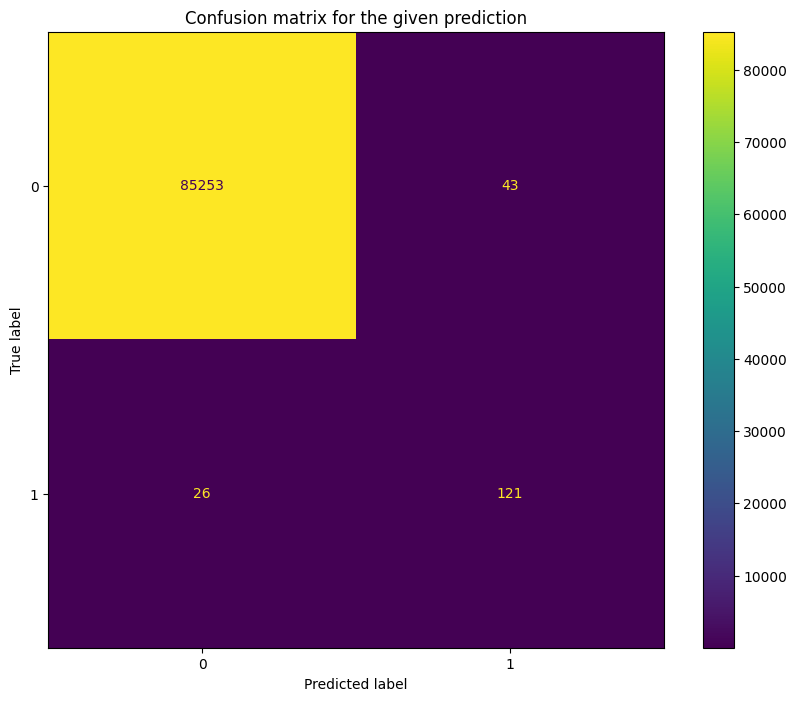

In [ ]:
#model evaluation
evaluation(y_test, y_pred)

We observe that the lightgbm model is performing poorly compared to Decision Tree in terms of recall score, but has a much better f1-score. Let us see whether we can improve the performance of the lightgbm model by increasing the weight of the positive class

In [ ]:
lgbm=LGBMClassifier(scale_pos_weight=100)
lg_model=lgbm.fit(x_train_sampled,y_train_sampled)
y_pred=lg_model.predict(x_test)

[LightGBM] [Info] Number of positive: 199019, number of negative: 199019
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 398038, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Accuracy Score: 0.9964654799105837
f1_score: 0.4548736462093863
Precision: 0.3095823095823096
Recall: 0.8571428571428571
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.31      0.86      0.45       147

    accuracy                           1.00     85443
   macro avg       0.65      0.93      0.73     85443
weighted avg       1.00      1.00      1.00     85443



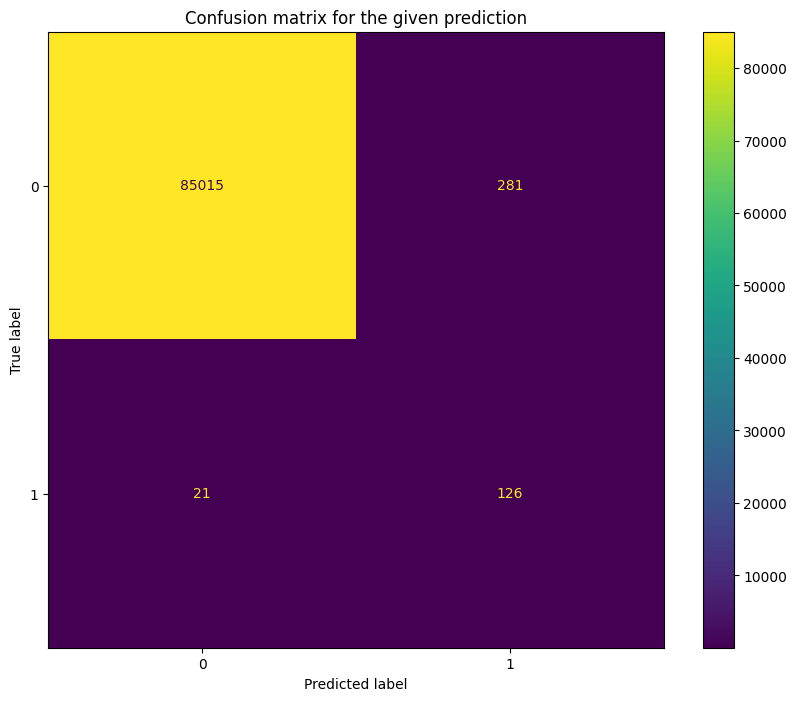

In [ ]:
#model evaluation
evaluation(y_test,y_pred)

We observe that Lightgbm still doesn't have a better recall score than logistic regression or Decision tree, even with providing a higher weightage to the positive class. Out of all the models we tried so far, Logistic Regression seems to be working the best

Conclusion

Out of all the models we saw that Logistic Regression worked the best for us in terms of recall score, though the model had a lot of false positives.

The best method to solve the given problem was applying an oversampling technique(SMOTE) and then applying Logistic regression.

Tree based models seem to be giving a good f1-score but a poor recall score comparitively

Boosting methods seem to be performing the best in terms of having the least amount of false positives.